<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%205/Netflix/Colab%20Notebook/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

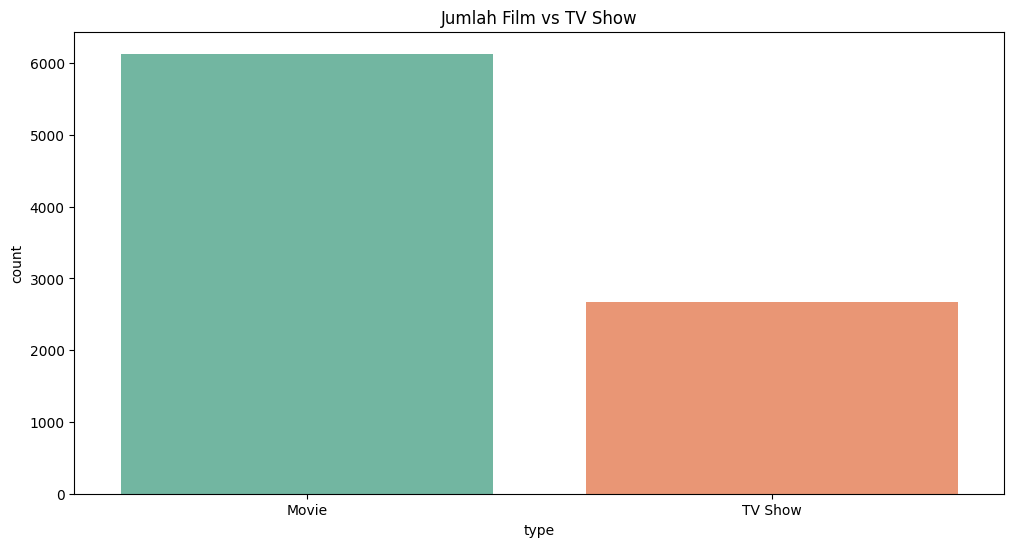

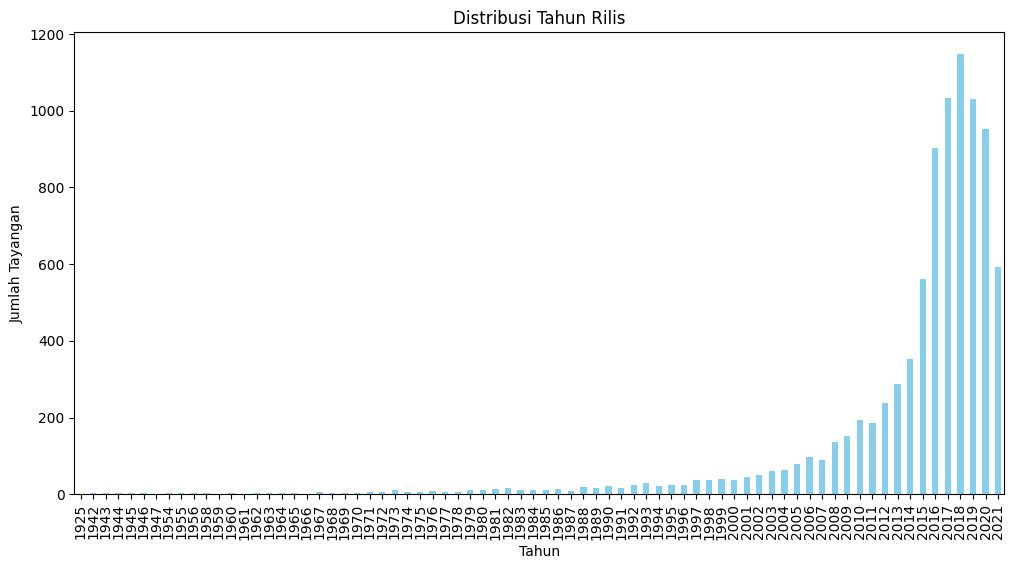

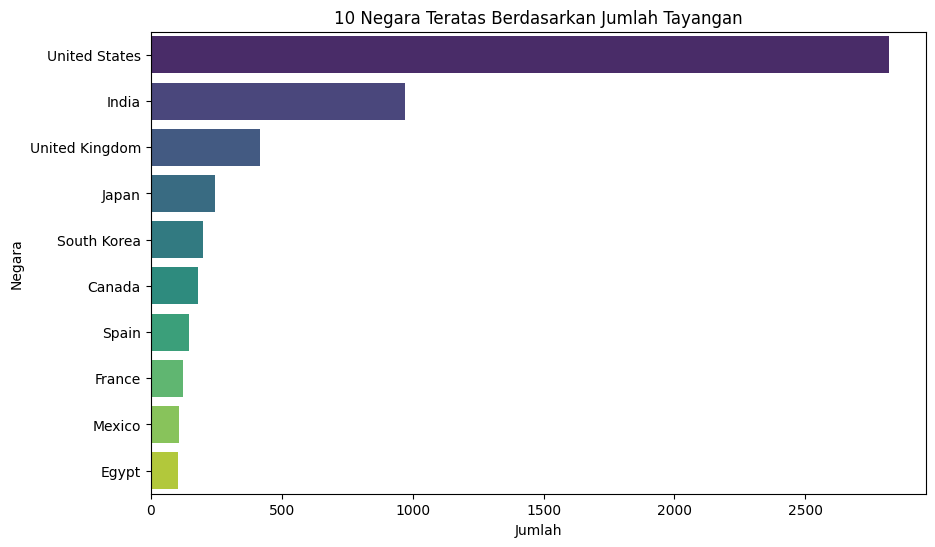

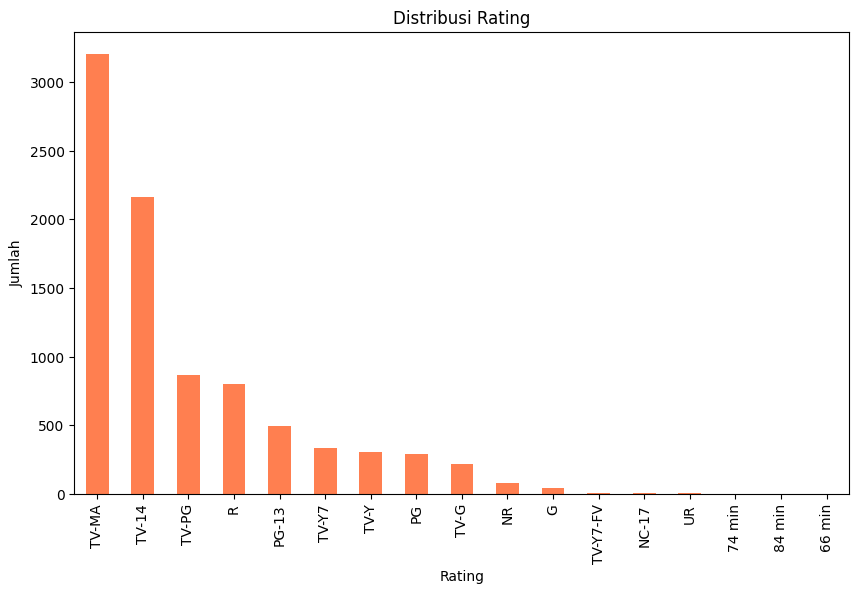

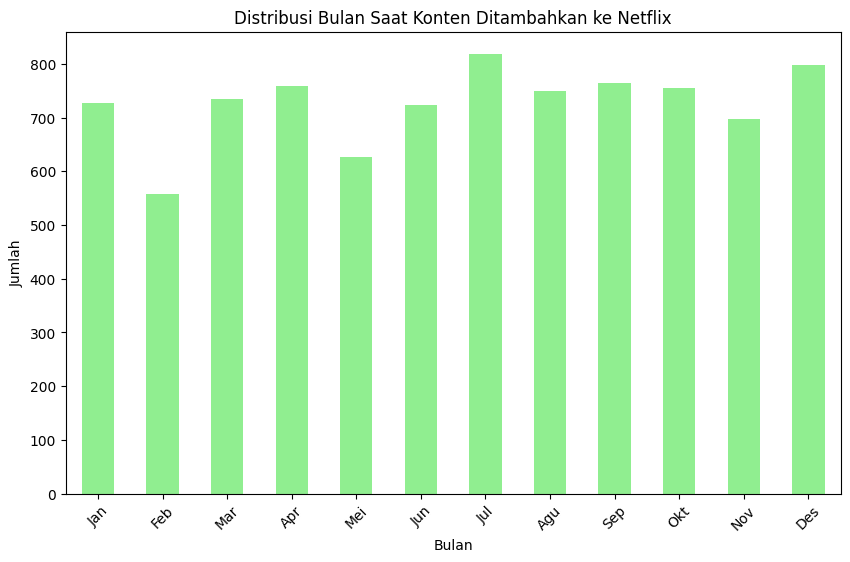

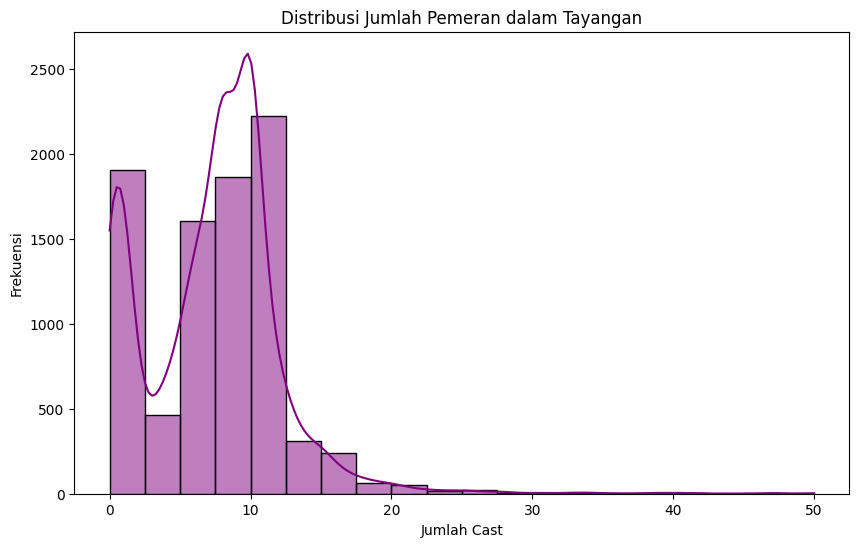

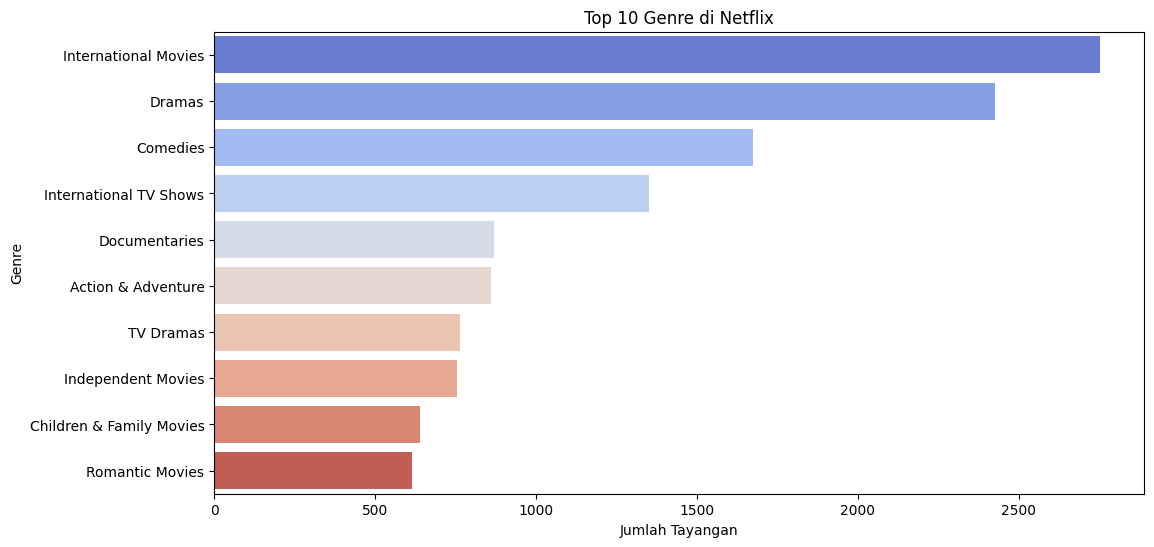

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv"
df = pd.read_csv(url)
# ===== FEATURE ENGINEERING =====
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
#If the format is not consistent, using errors='coerce' will insert NaT (Not a Time) for the dates that it cannot parse.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Count number of cast members
df['cast_count'] = df['cast'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# ===== EDA & VISUALIZATION =====

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False) # Assign 'x' to 'hue' and set legend to False
plt.title('Jumlah Film vs TV Show')
plt.show()

plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Tayangan')
plt.show()

plt.figure(figsize=(10, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, hue=top_countries.index, palette='viridis', legend=False) # Assign 'y' to 'hue' and set legend to False
plt.title('10 Negara Teratas Berdasarkan Jumlah Tayangan')
plt.xlabel('Jumlah')
plt.ylabel('Negara')
plt.show()

plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(10, 6))
df['month_added'].dropna().value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribusi Bulan Saat Konten Ditambahkan ke Netflix')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(ticks=np.arange(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['cast_count'], bins=20, kde=True, color='purple')
plt.title('Distribusi Jumlah Pemeran dalam Tayangan')
plt.xlabel('Jumlah Cast')
plt.ylabel('Frekuensi')
plt.show()

# ===== TOP GENRES =====
plt.figure(figsize=(12, 6))
all_genres = df['listed_in'].dropna().str.split(', ')
all_genres = all_genres.explode()
top_genres = all_genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='coolwarm', legend=False) # Assign 'y' to 'hue' and set legend to False
plt.title('Top 10 Genre di Netflix')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Genre')
plt.show()